## Ejercicio Práctico: Hierarchical Clustering

### Paso 1: Importar las librerias

In [1]:
# Libreria para operaciones matemáticas o estadísticas
import numpy as np
# Libreria para el manejo de datos
import pandas as pd
# Librerías para gráficas
import seaborn as sb
import matplotlib.pyplot as plt
# Libreria para el agrupamiento Aglomerativo
from sklearn.cluster import AgglomerativeClustering
# Libreria para generar el dendograma
from scipy.cluster.hierarchy import dendrogram, linkage

### Paso 2: Cargar los datos en un DataFrame

In [2]:
# Se cargan los datos de entrada
data = pd.read_csv("data/3.3-water_chem_analysis.csv", sep=";")
# Se observa los primeros 10 registros del DataFrame
data.head(10)

,Aquifer,Conductivity [µS/cm],TDS [mg/l],Na+ [mg/l],K+ [mg/l],Ca 2+ [mg/l],Mg 2+ [mg/l],Cl- [mg/l],SO4 2- [mg/l],Cu 2+ [mg/l]
0,Ca2+Na,165.0,131600.0,41530.0,194.0,2592.0,775.0,70781.0,4186.0,0.020
1,Ca2,107.4,93500.0,28900.0,135.0,2764.0,663.0,48215.0,3968.0,0.020
2,Ca2+Na,230.4,206700.0,72125.0,177.0,2573.0,866.0,110726.0,3593.0,1.150
3,Ca2+Na,229.0,193500.0,65600.0,129.0,2596.0,652.0,109325.0,3623.0,4.990
4,Ca2 brine,336.0,293850.0,110000.0,199.0,2076.0,753.0,175200.0,3358.0,0.020
5,Ca2+Na,173.0,141550.0,48300.0,134.0,2854.0,695.0,80806.0,4794.0,0.048
6,Ca2+Na,279.0,276850.0,84600.0,1320.0,1940.0,114.2,135140.0,5609.0,0.023
7,Ca2+Na,171.0,133350.0,48190.0,109.0,2595.0,1144.0,75929.0,4261.0,0.020
8,Ca2,97.5,83250.0,25300.0,96.8,2295.0,1130.0,43746.0,3871.0,0.020
9,Ca2+Na,355.0,232300.0,86300.0,128.0,2475.0,667.0,130961.0,4089.0,0.020


### Paso 3: Preprocesamiento de los datos

In [3]:
# Se buscan registros NaN para eliminarlos
print('Columna           Cantidad NaN')
print(data.isnull().sum(axis = 0))
print(data.shape)

Columna           Cantidad NaN
Aquifer                   0
Conductivity [µS/cm]    109
TDS [mg/l]                5
Na+ [mg/l]              107
K+ [mg/l]               171
Ca 2+ [mg/l]            106
Mg 2+ [mg/l]            107
Cl- [mg/l]                1
SO4 2- [mg/l]             9
Cu 2+ [mg/l]            175
dtype: int64
(328, 10)


In [4]:
# Se eliminan los registros NaN
data = data.dropna()
data.shape

(148, 10)

In [5]:
# Se observan los primeros registros
data.head()

,Aquifer,Conductivity [µS/cm],TDS [mg/l],Na+ [mg/l],K+ [mg/l],Ca 2+ [mg/l],Mg 2+ [mg/l],Cl- [mg/l],SO4 2- [mg/l],Cu 2+ [mg/l]
0,Ca2+Na,165.0,131600.0,41530.0,194.0,2592.0,775.0,70781.0,4186.0,0.02
1,Ca2,107.4,93500.0,28900.0,135.0,2764.0,663.0,48215.0,3968.0,0.02
2,Ca2+Na,230.4,206700.0,72125.0,177.0,2573.0,866.0,110726.0,3593.0,1.15
3,Ca2+Na,229.0,193500.0,65600.0,129.0,2596.0,652.0,109325.0,3623.0,4.99
4,Ca2 brine,336.0,293850.0,110000.0,199.0,2076.0,753.0,175200.0,3358.0,0.02


In [6]:
# Se observan los tipos de datos para las columnas
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148 entries, 0 to 325
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Aquifer               148 non-null    object 
 1   Conductivity [µS/cm]  148 non-null    float64
 2   TDS [mg/l]            148 non-null    object 
 3   Na+ [mg/l]            148 non-null    object 
 4   K+ [mg/l]             148 non-null    float64
 5   Ca 2+ [mg/l]          148 non-null    object 
 6   Mg 2+ [mg/l]          148 non-null    object 
 7   Cl- [mg/l]            148 non-null    float64
 8   SO4 2- [mg/l]         148 non-null    object 
 9   Cu 2+ [mg/l]          148 non-null    float64
dtypes: float64(4), object(6)
memory usage: 12.7+ KB


In [7]:
# Se convierten los tipos de datos para el agrupamiento
data['TDS [mg/l]'] = data['TDS [mg/l]'].astype(float)
data['Na+ [mg/l]'] = data['Na+ [mg/l]'].astype(float)
data['Ca 2+ [mg/l]'] = data['Ca 2+ [mg/l]'].astype(float)
data['Mg 2+ [mg/l]'] = data['Mg 2+ [mg/l]'].astype(float)
data['SO4 2- [mg/l]'] = data['SO4 2- [mg/l]'].astype(float)

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148 entries, 0 to 325
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Aquifer               148 non-null    object 
 1   Conductivity [µS/cm]  148 non-null    float64
 2   TDS [mg/l]            148 non-null    float64
 3   Na+ [mg/l]            148 non-null    float64
 4   K+ [mg/l]             148 non-null    float64
 5   Ca 2+ [mg/l]          148 non-null    float64
 6   Mg 2+ [mg/l]          148 non-null    float64
 7   Cl- [mg/l]            148 non-null    float64
 8   SO4 2- [mg/l]         148 non-null    float64
 9   Cu 2+ [mg/l]          148 non-null    float64
dtypes: float64(9), object(1)
memory usage: 12.7+ KB


In [8]:
# Se observan las estadísticas de los datos
data.describe()

,Conductivity [µS/cm],TDS [mg/l],Na+ [mg/l],K+ [mg/l],Ca 2+ [mg/l],Mg 2+ [mg/l],Cl- [mg/l],SO4 2- [mg/l],Cu 2+ [mg/l]
count,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000
mean,257.241081,219387.789865,81290.559189,222.731149,2434.493784,644.382500,128725.441703,3393.828311,1.122635
std,124.880290,109267.338811,43656.524394,168.784847,487.193846,159.736247,66252.448611,769.056196,2.047089
min,5.520000,1108.600000,77.760000,25.390000,56.180000,0.240000,87.772000,7.490000,0.001000
25%,119.550000,109075.000000,35600.000000,126.750000,2275.000000,583.000000,59198.250000,3014.000000,0.020000
50%,302.500000,261825.000000,89650.000000,193.500000,2446.500000,649.500000,147575.000000,3322.000000,0.063000
75%,373.250000,325150.000000,125000.000000,262.750000,2625.750000,704.250000,191065.500000,3858.500000,1.267500
max,469.000000,334050.000000,139000.000000,1320.000000,3992.000000,1144.000000,204728.000000,5609.000000,10.200000


### Paso 4: Hierarchical Clustering

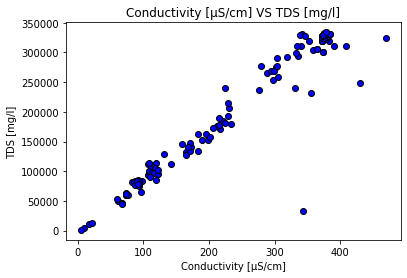

In [9]:
# Se genera la gráfica de dispersión bidimensional
plt.scatter(
   # Se utilizaran estas columnas para el agrupamiento X ('Conductivity [µS/cm]') y Y ('TDS [mg/l]')
   data['Conductivity [µS/cm]'], data['TDS [mg/l]'],
   c='blue', marker='o',
   edgecolor='black'
)
plt.title("Conductivity [µS/cm] VS TDS [mg/l]")
plt.xlabel('Conductivity [µS/cm]')
plt.ylabel('TDS [mg/l]')
plt.show()

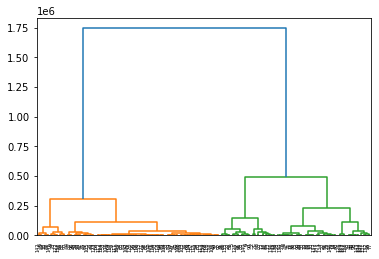

In [24]:
# Se seleccionan las columnas: Conductivity [µS/cm] y TDS [mg/l] del DataFrame
X = data.iloc[:,[1,2]].values

# Se crea el dendograma
dendograma = dendrogram(linkage(X, method='ward', metric='euclidean'))

##### Nota: En el dendodrama se puede observar que el número de Clustering es 4

In [25]:
# Se genera la predicción con distancia euclidiana
ac = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')

ac.fit(X)

labels = ac.labels_

labels

array([0, 4, 0, 0, 1, 0, 3, 0, 4, 3, 4, 4, 0, 0, 4, 0, 3, 0, 4, 4, 4, 0,
       0, 1, 1, 2, 1, 4, 4, 4, 4, 0, 0, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 2, 3, 4, 0, 3, 0, 0, 0, 0, 1, 3,
       3, 3, 0, 0, 1, 1, 1, 1, 1, 3, 2, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 0, 2, 2, 2, 2, 4, 2,
       2, 3, 4, 0, 0, 4, 0, 1, 0, 3, 3, 2, 2, 2, 4, 4])

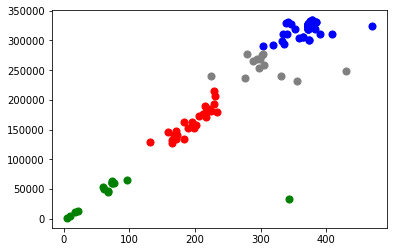

In [29]:
# Se genera la gráfica de los clustering
# Cluster 1
plt.scatter(X[labels==0, 0], X[labels==0, 1], s=50, marker='o', color='red')
# Cluster 2
plt.scatter(X[labels==1, 0], X[labels==1, 1], s=50, marker='o', color='blue')
# Cluster 3
plt.scatter(X[labels==2, 0], X[labels==2, 1], s=50, marker='o', color='green')
# Cluster 4
plt.scatter(X[labels==3, 0], X[labels==3, 1], s=50, marker='o', color='gray')
plt.show()